<a href="https://colab.research.google.com/github/yasminmulla/CaseStudy/blob/Walmart/Walmart_BusinessCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> ***Project CaseStudy : Walmart*** </h1>
<h2>
<ul>
<li> **1.Problem Statement and Analyzing basic metrics **</li>
<li> **2. Missing Value and Outlier Detection** </li>
<li> **3. Business Insights based on Non- Graphical and Visual Analysis ** </li>
<li> **4.	Statistical Analysis to Answer mentined questions:  
  <ul>
  <li>
1.	Are women spending more money per transaction than men? Why or Why not?  </li>
<li>
2.	Confidence intervals and distribution of the mean of the expenses by female and male customers  </li>
<li>
3.	Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?  </li>
<li>
4.	Results when the same activity is performed for Married vs Unmarried  </li>
<li>
5.	Results when the same activity is performed for Age </li>
<li> 6. Central limit theorem to compute the interval </li>
</ul>
** </li>
  
<li> **6. Business Insights**</li>  
<li> **7. Recommendations**</li>  
</ul></h2>

In [ ]:
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import statistics as stat

from scipy.stats import percentileofscore

<h4> **1. Problem Statement and Analyzing basic metrics** </h4>

>>> The Walmart Inc. management team aims to analyze customer purchasing behavior, particularly the purchase amounts, in relation to customer gender and other relevant factors. This analysis is intended to provide valuable insights for informed decision-making. The primary objective is to determine potential variations in spending habits between male and female customers, specifically focusing on whether women tend to spend more than men during Black Friday sales. The assumption is made that there are 50 million male customers and 50 million female customers, and the analysis aims to shed light on gender-based spending patterns."







In [ ]:
#Reading CSV file and loading it into datafram
import os
current_directory = os.getcwd()
print(current_directory)


/content


In [ ]:
walmart_df = pd.read_csv(os.path.join(os.getcwd(), 'walmart_data.csv'), delimiter=',')

In [ ]:
walmart_df.shape

(550068, 10)

**550068 rows present in walmart data file. This all data
 is from Black Friday **

In [ ]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**All coloumns and datatype are well defined **

In [ ]:
walmart_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
walmart_df.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
walmart_df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Data looks incredibly neat and clean. There is no missing data found. Datatype of all columns are well defined.**

**2. Missing Value and Outlier Detection**  

In [ ]:
# Convert 'Age_Group' to numerical form (0-17: 0, 18-25: 1, 26-35: 2, 36-50: 3, 51+: 4)
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-50': 3, '51+': 4}
walmart_df['Age_Group_Num'] = walmart_df['Age'].map(age_mapping)

In [ ]:
# Select the numerical columns for the box plot, other analysis
numerical_columns = ['Occupation', 'Stay_In_Current_City_Years', 'Product_Category','Age_Group_Num']

In [ ]:
walmart_df[numerical_columns].nunique()

Occupation                    21
Stay_In_Current_City_Years     5
Product_Category              20
Age_Group_Num                  3
dtype: int64

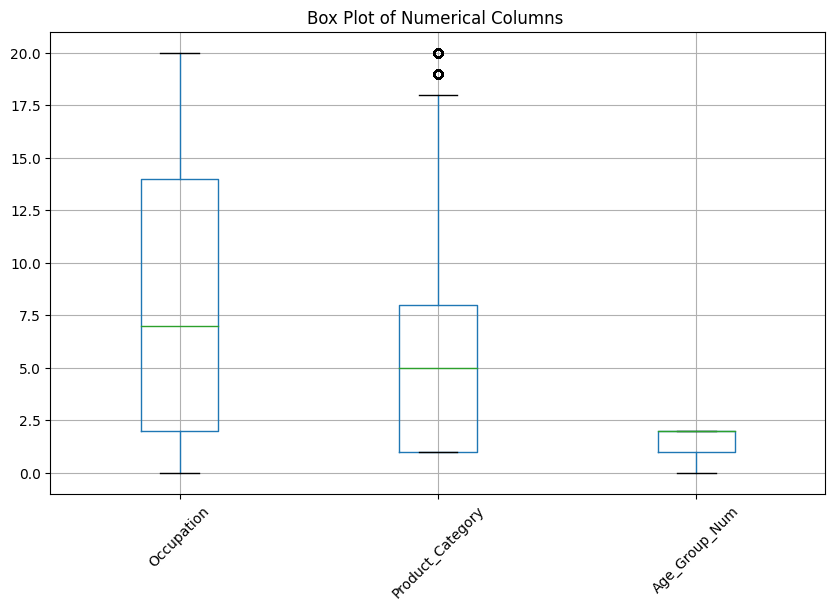

In [ ]:
# Create the box plots for the numerical columns
plt.figure(figsize=(10, 6))
walmart_df[numerical_columns].boxplot()
plt.title("Box Plot of Numerical Columns ")
plt.xticks(rotation=45)
plt.show()

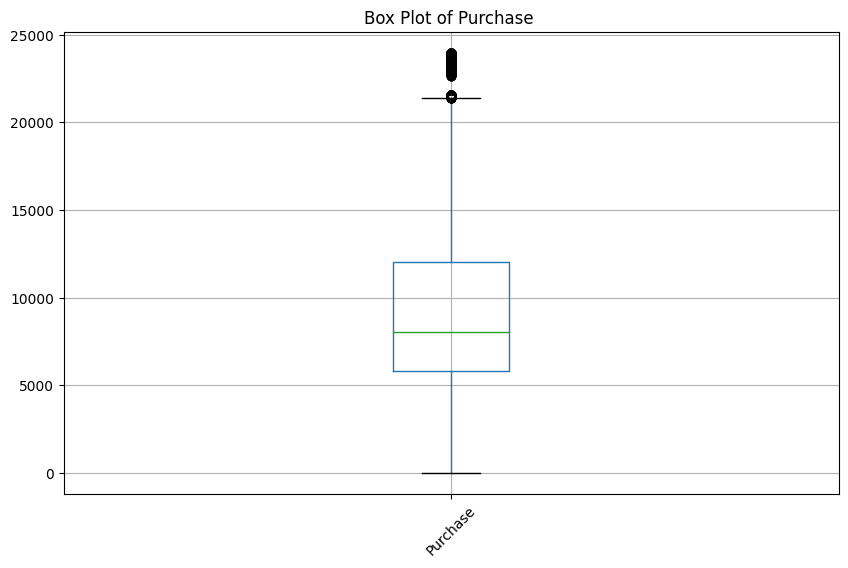

In [ ]:
# Create the box plots for the Purchase
plt.figure(figsize=(10, 6))
walmart_df[['Purchase']].boxplot()
plt.title("Box Plot of Purchase ")
plt.xticks(rotation=45)
plt.show()

**3. Business Insights based on Non- Graphical and Visual Analysis **

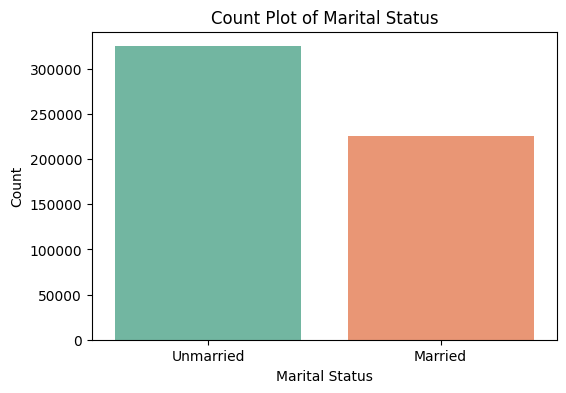

In [ ]:
# Create a count plot for Marital_Status
plt.figure(figsize=(6, 4))
sns.countplot(data=walmart_df, x='Marital_Status', palette='Set2')
plt.title('Count Plot of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Unmarried', 'Married'])
plt.show()

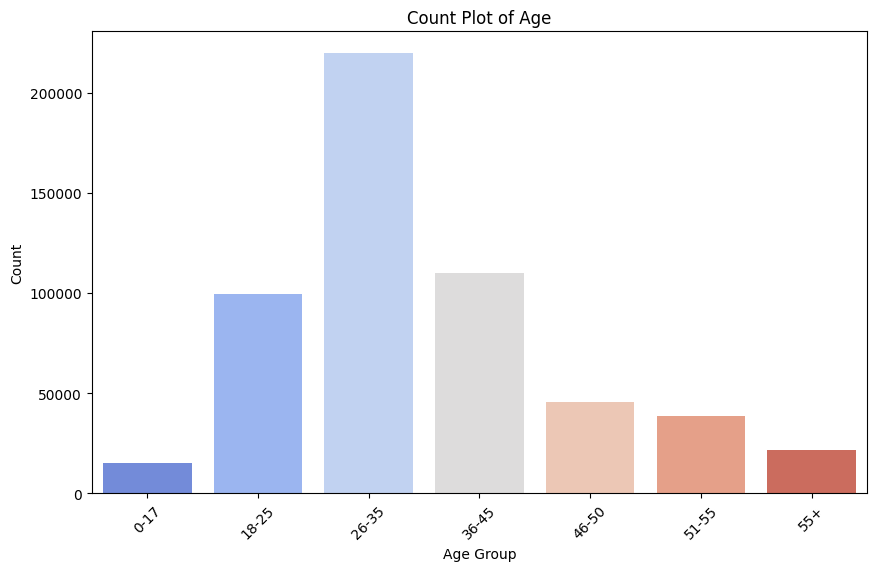

In [ ]:
# Sort the 'Age' column in ascending order
sorted_age_order =  ['0-17','18-25','26-35','36-45', '46-50','51-55','55+']
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a count plot for 'Age' variable
sns.countplot(x='Age', data=walmart_df, palette='coolwarm', order=sorted_age_order)
plt.title('Count Plot of Age')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

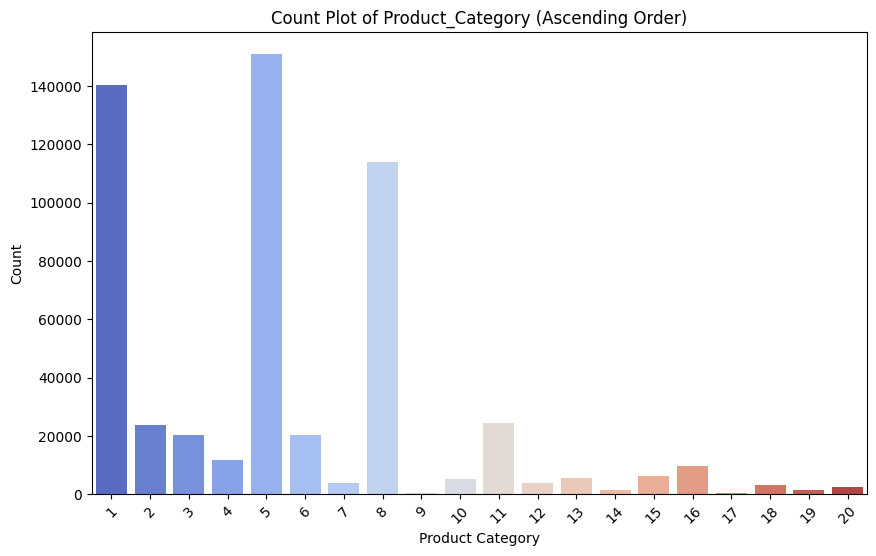

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a count plot for 'Age' variable with sorted order
sns.countplot(x='Product_Category', data=walmart_df, palette='coolwarm' )
plt.title('Count Plot of Product_Category (Ascending Order)')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

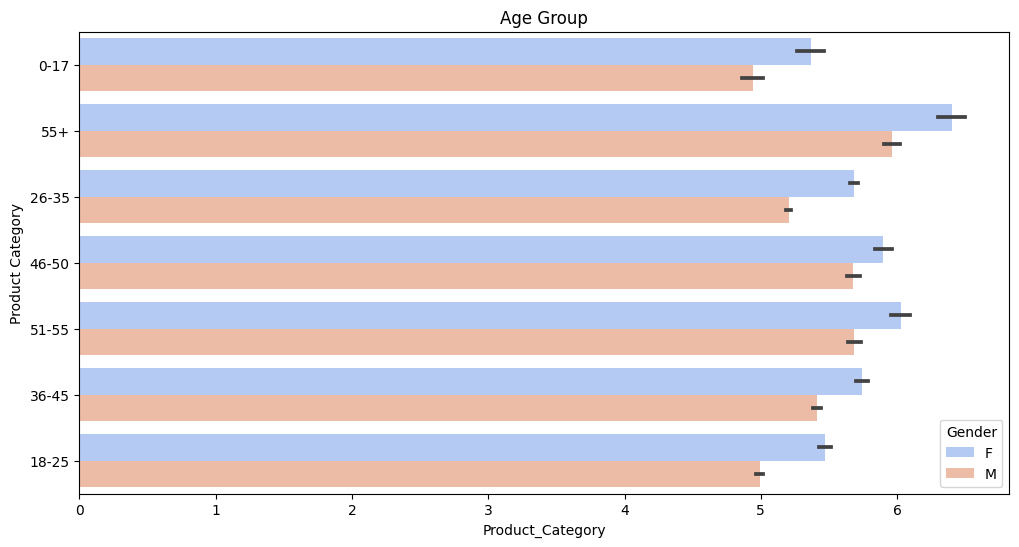

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Category', y='Age', hue='Gender', data=walmart_df, palette='coolwarm')
plt.title('Age Group')
plt.ylabel('Product Category')

plt.show()

In [ ]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase,Age_Group_Num
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,334349.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713,1.611591
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394,0.572612
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000,0.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000,1.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000,2.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000,2.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000,2.000000


In [ ]:
correlation_matrix = walmart_df.corr()
correlation_matrix

<ipython-input-39-4b41eeb02a9b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = walmart_df.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase,Age_Group_Num
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716,0.085393
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833,0.040433
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463,0.230447
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703,0.024341
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000,0.013342
Age_Group_Num,0.085393,0.040433,0.230447,0.024341,0.013342,1.000000


<ipython-input-54-c2292a186b05>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = walmart_df[selected_columns].corr()


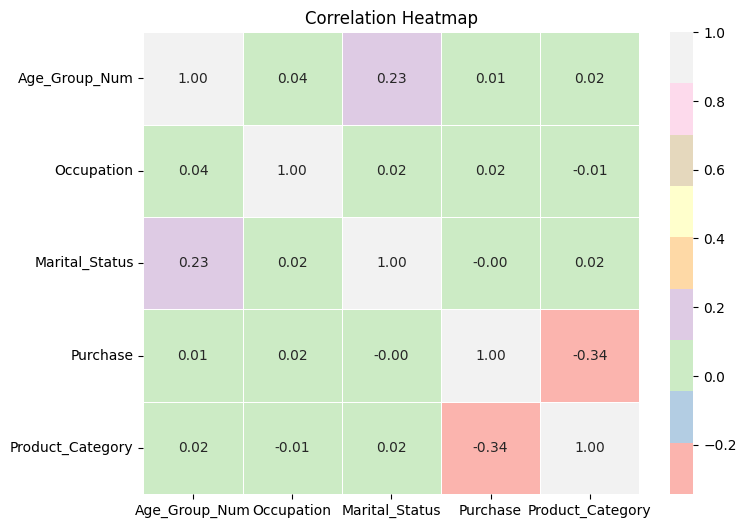

In [ ]:
# Select the columns for the correlation matrix
selected_columns = ['Age_Group_Num', 'Gender', 'Occupation', 'Marital_Status', 'Purchase', 'Product_Category']
correlation_matrix = walmart_df[selected_columns].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Pastel1", fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Population mean for Marital Status
groupby_MaritalStatus = walmart_df.groupby('Marital_Status')['Purchase'].mean()
groupby_MaritalStatus

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [ ]:
# Population mean for Gender
groupby_Gender = walmart_df.groupby('Gender')['Purchase'].mean()
groupby_Gender

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [ ]:
# Population mean for Occupation
groupby_Occupation = walmart_df.groupby('Occupation')['Purchase'].mean()
groupby_Occupation

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

In [ ]:
# Population mean for Product Categoru
groupby_ProductCategory = walmart_df.groupby('Occupation')['Purchase'].mean()
groupby_ProductCategory

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

<Axes: xlabel='Occupation', ylabel='Purchase'>

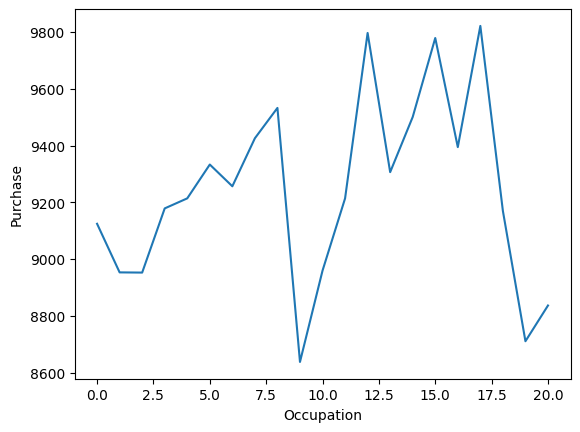

In [ ]:
sns.lineplot(groupby_ProductCategory)

In [ ]:
# Population mean for Stay_In_Current_City_Years
groupby_Stay_In_Current_City_Years = walmart_df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
groupby_Stay_In_Current_City_Years

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

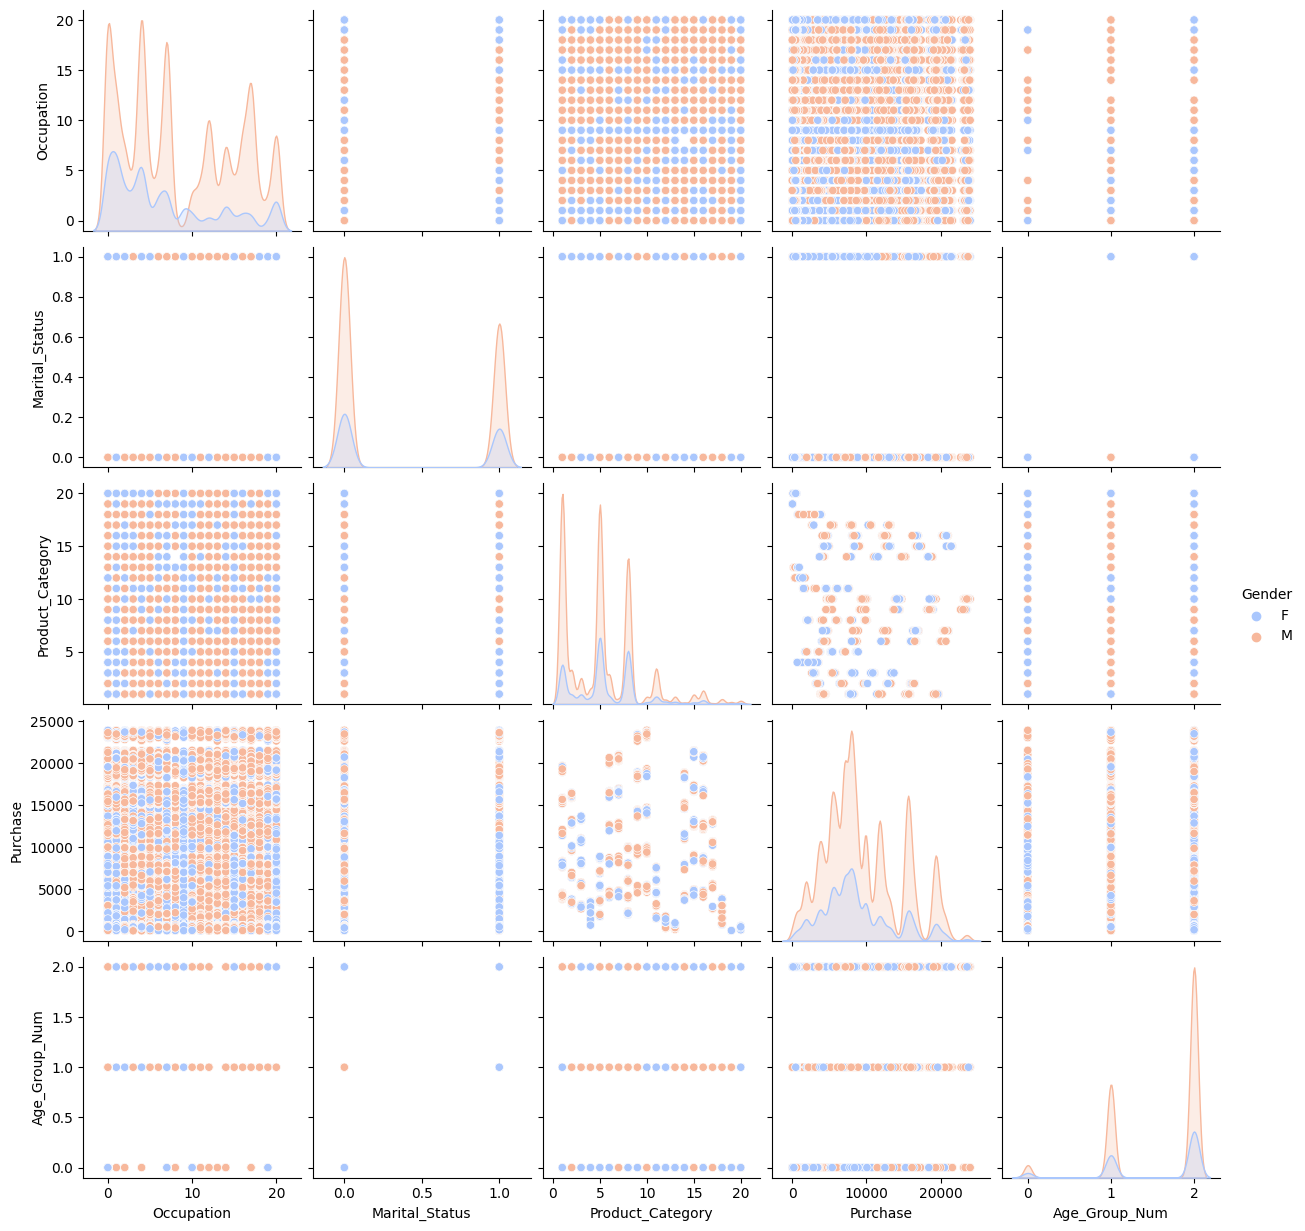

In [ ]:

# Drop unnecessary columns for the pair plot
columns_to_drop = ['User_ID', 'Product_ID', 'Age']
walmart_df_pairplot = walmart_df.drop(columns=columns_to_drop)

# Create the pair plot
sns.pairplot(walmart_df_pairplot, hue='Gender', palette='coolwarm')
plt.show()

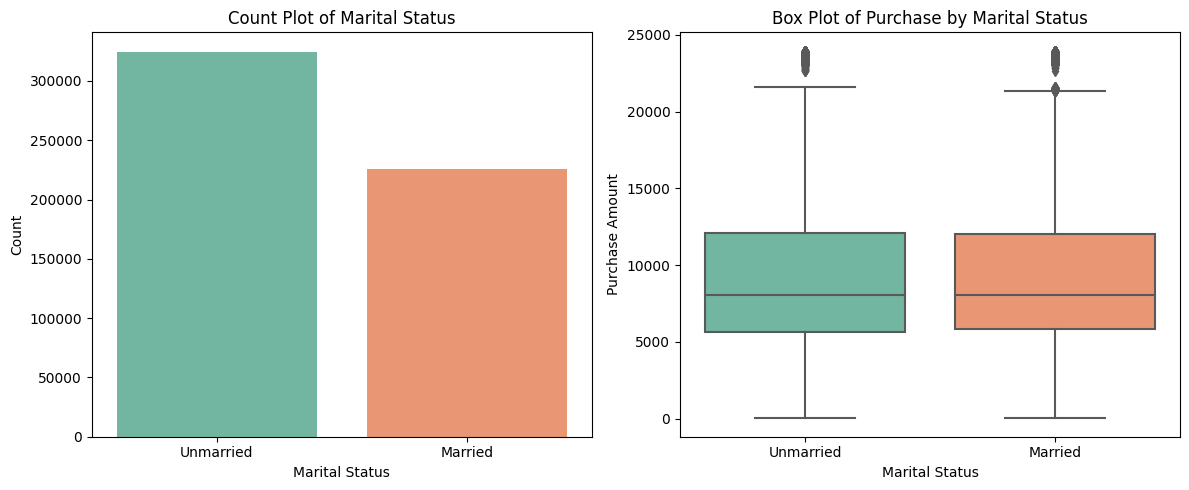

In [ ]:

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot 1: Count Plot of Marital Status
sns.countplot(data=walmart_df, x='Marital_Status', palette='Set2', ax=axes[0])
axes[0].set_title('Count Plot of Marital Status')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Unmarried', 'Married'])

# Plot 2: Box Plot of Purchase by Marital Status
sns.boxplot(data=walmart_df, x='Marital_Status', y='Purchase', palette='Set2', ax=axes[1])
axes[1].set_title('Box Plot of Purchase by Marital Status')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Purchase Amount')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Unmarried', 'Married'])

plt.tight_layout()
plt.show()


>>> Number of unmarried customer are more than married customer but on average they spend approximently same amount on purchase

# **4. Statistical Analysis to answer mentioned questions:**
1. Are women spending more money per transaction than men? Why or Why not?
2. Confidence intervals and distribution of the mean of the expenses by female and male customers
3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
4. Results when the same activity is performed for Married vs Unmarried
5. Results when the same activity is performed for Age

Average amount spent per transaction for female customers: 8734.565765155476
Average amount spent per transaction for male customers: 9437.526040472265
Male customers spend more on average per transaction.


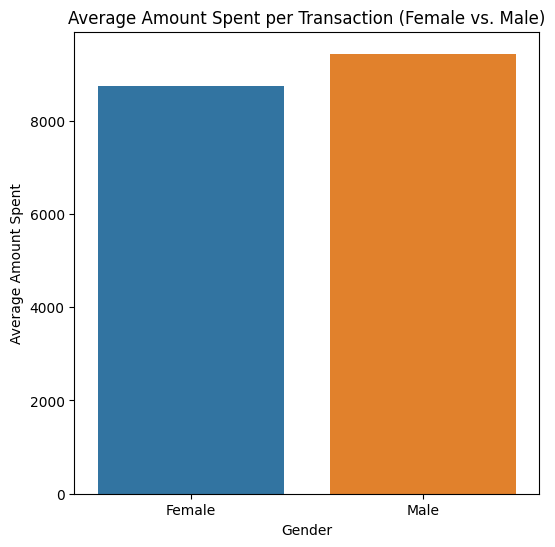

In [ ]:
# Calculate the average amount spent per transaction for female customers
average_spent_female = walmart_df[walmart_df['Gender'] == 'F']['Purchase'].mean()

# Calculate the average amount spent per transaction for male customers
average_spent_male = walmart_df[walmart_df['Gender'] == 'M']['Purchase'].mean()

# Print the results
print("Average amount spent per transaction for female customers:", average_spent_female)
print("Average amount spent per transaction for male customers:", average_spent_male)

# Compare and conclude based on the results
if average_spent_female > average_spent_male:
    print("Female customers spend more on average per transaction.")
elif average_spent_female < average_spent_male:
    print("Male customers spend more on average per transaction.")
else:
    print("Average spending per transaction is the same for both female and male customers.")


# Comparison of Average Expenses (Bar Plot)
plt.figure(figsize=(6, 6))
sns.barplot(x=['Female', 'Male'], y=[average_spent_female, average_spent_male])
plt.title('Average Amount Spent per Transaction (Female vs. Male)')
plt.xlabel('Gender')
plt.ylabel('Average Amount Spent')
plt.show()


### **1. Are women spending more money per transaction than men? Why or Why not?**

In [ ]:

# Calculate average spending for women and men
avg_spending_women = walmart_df[walmart_df['Gender'] == 'F']['Purchase'].mean()
avg_spending_men = walmart_df[walmart_df['Gender'] == 'M']['Purchase'].mean()

# Calculate standard deviation for women and men
std_dev_women = walmart_df[walmart_df['Gender'] == 'F']['Purchase'].std()
std_dev_men = walmart_df[walmart_df['Gender'] == 'M']['Purchase'].std()

# Calculate the probability using the normal distribution
probability_women_more = 1 - norm.cdf(avg_spending_men, avg_spending_women, np.sqrt(std_dev_women**2 + std_dev_men**2))

print("Average spedning for Women :", avg_spending_women)
print("Average spedning for Men :", avg_spending_men)
print("Probability of women spending more than men:", round(probability_women_more*100,2) , "%")



Average spedning for Women : 8734.565765155476
Average spedning for Men : 9437.526040472265
Probability of women spending more than men: 45.99 %


>> **This suggests that, on average, male customers tend to spend more than female customers.**

>> The observation that men spend more than women can be influenced by a combination of various social, cultural, economic, and psychological factors. However, it's important to note that individual spending behavior can vary widely and not all men spend more than women, nor is this observation a universal truth. Here are some potential reasons why men might spend more than women in certain contexts:

>>>Consumer Preferences: Men and women may have different preferences for products and services. Men might be more inclined to spend on certain categories such as electronics, gadgets, and hobbies that tend to have higher price points.


>>>Income Disparities: Income disparities between genders can play a role. If men, on average, earn more than women, they might have more disposable income to spend.

>>> Market Targeting: Retailers and marketers might target men with products and promotions that encourage higher spending.

>>It's important to emphasize that these are general observations and do not apply universally to all individuals. Additionally, spending behavior is influenced by a complex interplay of personal, cultural, economic, and psychological factors, making it difficult to pinpoint a single reason for observed spending differences.

### **2. Confidence intervals and distribution of the mean of the expenses by female and male customers**

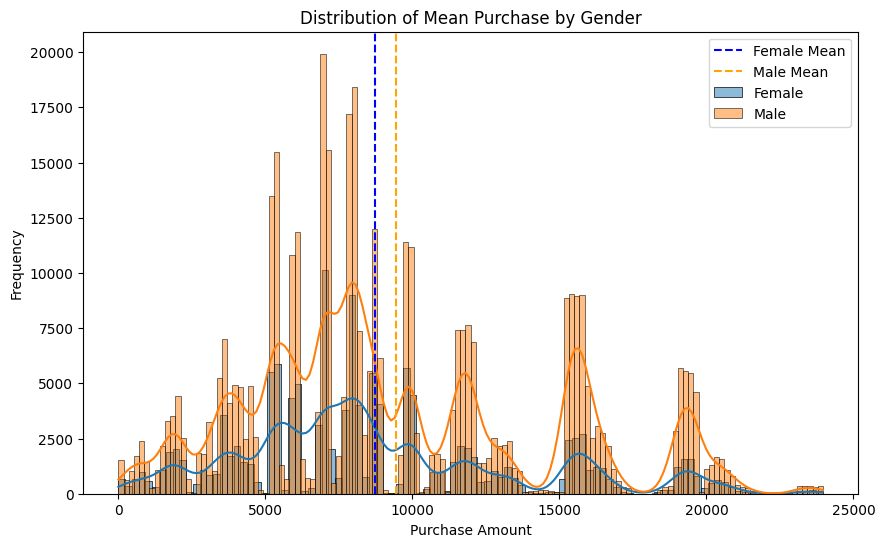

Confidence Interval for Female Mean: (8709.21154714068, 8759.919983170272)
Confidence Interval for Male Mean: (9422.01944736257, 9453.032633581959)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Select purchase data for female and male customers
female_purchase = walmart_df[walmart_df['Gender'] == 'F']['Purchase']
male_purchase = walmart_df[walmart_df['Gender'] == 'M']['Purchase']

# Calculate sample statistics
female_mean = female_purchase.mean()
male_mean = male_purchase.mean()
female_std = female_purchase.std()
male_std = male_purchase.std()
n_female = len(female_purchase)
n_male = len(male_purchase)

# Calculate standard error of the mean
se_female = female_std / np.sqrt(n_female)
se_male = male_std / np.sqrt(n_male)

# Set the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the z-score for the desired confidence level
z_score = norm.ppf((1 + confidence_level) / 2)

# Calculate the margin of error
margin_of_error_female = z_score * se_female
margin_of_error_male = z_score * se_male

# Calculate confidence intervals
ci_female = (female_mean - margin_of_error_female, female_mean + margin_of_error_female)
ci_male = (male_mean - margin_of_error_male, male_mean + margin_of_error_male)

# Plot the distribution of the sample means
plt.figure(figsize=(10, 6))
sns.histplot(female_purchase, kde=True, label='Female')
sns.histplot(male_purchase, kde=True, label='Male')
plt.axvline(x=female_mean, color='blue', linestyle='--', label='Female Mean')
plt.axvline(x=male_mean, color='orange', linestyle='--', label='Male Mean')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Purchase by Gender')
plt.legend()
plt.show()

print("Confidence Interval for Female Mean:", ci_female)
print("Confidence Interval for Male Mean:", ci_male)


*The confidence intervals for the average spending of male and female customers are as follows:

Confidence Interval for Female Mean: (8709.21, 8759.92)
Confidence Interval for Male Mean: (9422.02, 9453.03)
These confidence intervals do not overlap, indicating that there is a statistically significant difference between the average spending of male and female customers. This suggests that, on average, male customers tend to spend more than female customers.*  

### **3.Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**
>> *No, the confidence intervals for the average male and female spending are not overlapping. The confidence interval for the female mean (8709.21 to 8759.92) and the confidence interval for the male mean (9422.02 to 9453.03) are distinct and do not share a common range. This indicates that there is a statistically significant difference between the average spending of male and female customers.*

**Implications for Walmart:**

**Marketing Strategies:**

Walmart can tailor its marketing strategies to cater to the preferences and spending behaviors of different gender groups. For instance, they could create gender-specific promotions or product recommendations to target male and female customers effectively.

**Customer Segmentation:**

Walmart can create distinct customer segments based on gender and spending behaviors. This segmentation can help in targeted advertising, promotions, and loyalty programs.

In [ ]:
walmart_df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_Group_Num
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,0.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,0.0


### **4. Results when the same activity is performed for Married vs Unmarried**

In [ ]:

avg_spending_Married = walmart_df[walmart_df['Marital_Status'] ==1]['Purchase'].mean()
avg_spending_UnMarried = walmart_df[walmart_df['Marital_Status'] ==0]['Purchase'].mean()


std_dev_Married = walmart_df[walmart_df['Marital_Status'] == 1]['Purchase'].std()
std_dev_UnMarried = walmart_df[walmart_df['Marital_Status'] == 0]['Purchase'].std()


probability_Married_more = 1 - norm.cdf(avg_spending_UnMarried, avg_spending_Married, np.sqrt(std_dev_Married**2 + std_dev_UnMarried**2))

print("Average spedning for Married :", avg_spending_Married)
print("Average spedning for UnMarried :", avg_spending_UnMarried)
print("Probability of Married spending more than UnMarried:", round(probability_Married_more*100,2) , "%")

Average spedning for Married : 9261.174574082374
Average spedning for UnMarried : 9265.907618921507
Probability of Married spending more than UnMarried: 49.97 %


>>> This suggests that, on average, married customers and unmarried customers tend to spend same purchase amount approximately

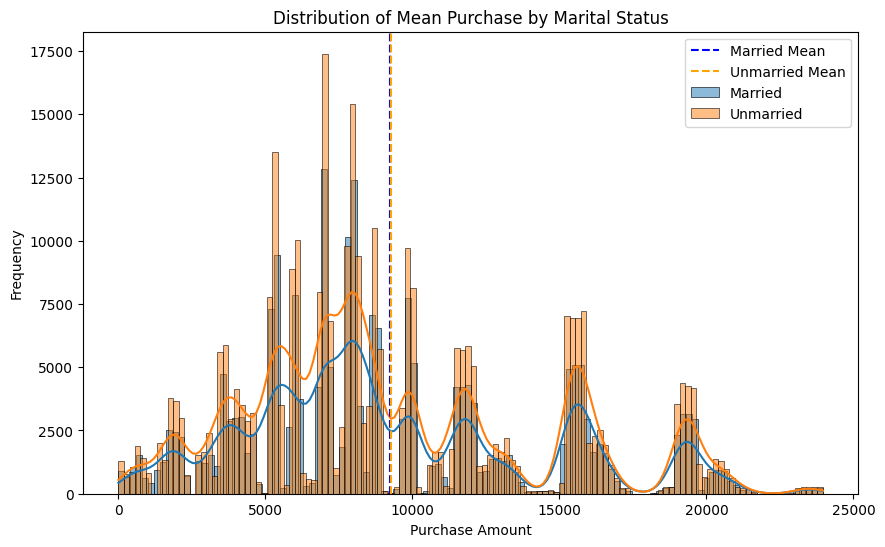

Confidence Interval for Married Mean: (9240.460427057078, 9281.888721107669)
Confidence Interval for Unmarried Mean: (9248.61641818668, 9283.198819656332)


In [ ]:
# Separate data for married and unmarried customers
married_purchase = walmart_df[walmart_df['Marital_Status'] == 1]['Purchase']
unmarried_purchase = walmart_df[walmart_df['Marital_Status'] == 0]['Purchase']

# Calculate sample statistics for married group
married_mean = married_purchase.mean()
married_std = married_purchase.std()
n_married = len(married_purchase)
se_married = married_std / np.sqrt(n_married)

# Calculate sample statistics for unmarried group
unmarried_mean = unmarried_purchase.mean()
unmarried_std = unmarried_purchase.std()
n_unmarried = len(unmarried_purchase)
se_unmarried = unmarried_std / np.sqrt(n_unmarried)

# Set the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the z-score for the desired confidence level
z_score = norm.ppf((1 + confidence_level) / 2)

# Calculate the margin of error
margin_of_error_married = z_score * se_married
margin_of_error_unmarried = z_score * se_unmarried

# Calculate confidence intervals
ci_married = (married_mean - margin_of_error_married, married_mean + margin_of_error_married)
ci_unmarried = (unmarried_mean - margin_of_error_unmarried, unmarried_mean + margin_of_error_unmarried)

# Plot the distribution of the sample means
plt.figure(figsize=(10, 6))
sns.histplot(married_purchase, kde=True, label='Married')
sns.histplot(unmarried_purchase, kde=True, label='Unmarried')
plt.axvline(x=married_mean, color='blue', linestyle='--', label='Married Mean')
plt.axvline(x=unmarried_mean, color='orange', linestyle='--', label='Unmarried Mean')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Purchase by Marital Status')
plt.legend()
plt.show()

print("Confidence Interval for Married Mean:", ci_married)
print("Confidence Interval for Unmarried Mean:", ci_unmarried)


>>> The confidence intervals for the mean purchase amount of married and unmarried customers are as follows:

>>>Confidence Interval for Married Mean: (9240.46, 9281.89)
Confidence Interval for Unmarried Mean: (9248.62, 9283.20)
These confidence intervals are very close to each other and appear to be overlapping. However, the overlapping of confidence intervals does not necessarily indicate that there is no significant difference between the means.


### **5. Results when the same activity is performed for Age**

In [ ]:
walmart_df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:


# Define the spending behavior criteria (e.g., Purchase above a certain threshold)
spending_threshold = 1000

# Calculate the total number of customers in each age group
age_group_counts = walmart_df['Age'].value_counts()

# Calculate the number of customers in each age group who meet the spending criteria
age_group_spending = walmart_df[walmart_df['Purchase'] > spending_threshold]['Age'].value_counts()

# Calculate the probability of the spending behavior for each age group
probability_by_age = age_group_spending / age_group_counts

# Display the probability for each age group
print("Probability of Spending Above $", spending_threshold)
print(probability_by_age)


Probability of Spending Above $ 1000
26-35    0.981256
36-45    0.978703
18-25    0.980403
46-50    0.977156
51-55    0.976910
55+      0.971447
0-17     0.975434
Name: Age, dtype: float64


>>> The spending behavior of customers in the 26-35, 36-45, 18-25, 46-50, and 51-55 age groups appears to be quite stable, with probabilities very close to each other. This indicates that the likelihood of spending above $1000 is relatively consistent across these age groups.


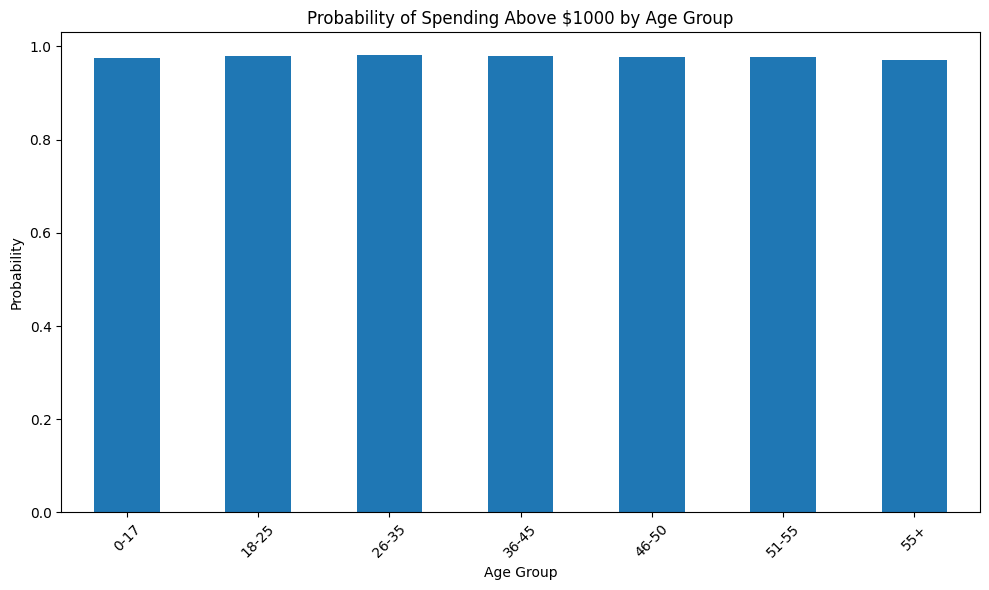

In [ ]:
# Plot the graph
plt.figure(figsize=(10, 6))
probability_by_age.sort_index().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Probability')
plt.title(f'Probability of Spending Above ${spending_threshold} by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **6. Central limit theorem to compute the interval**


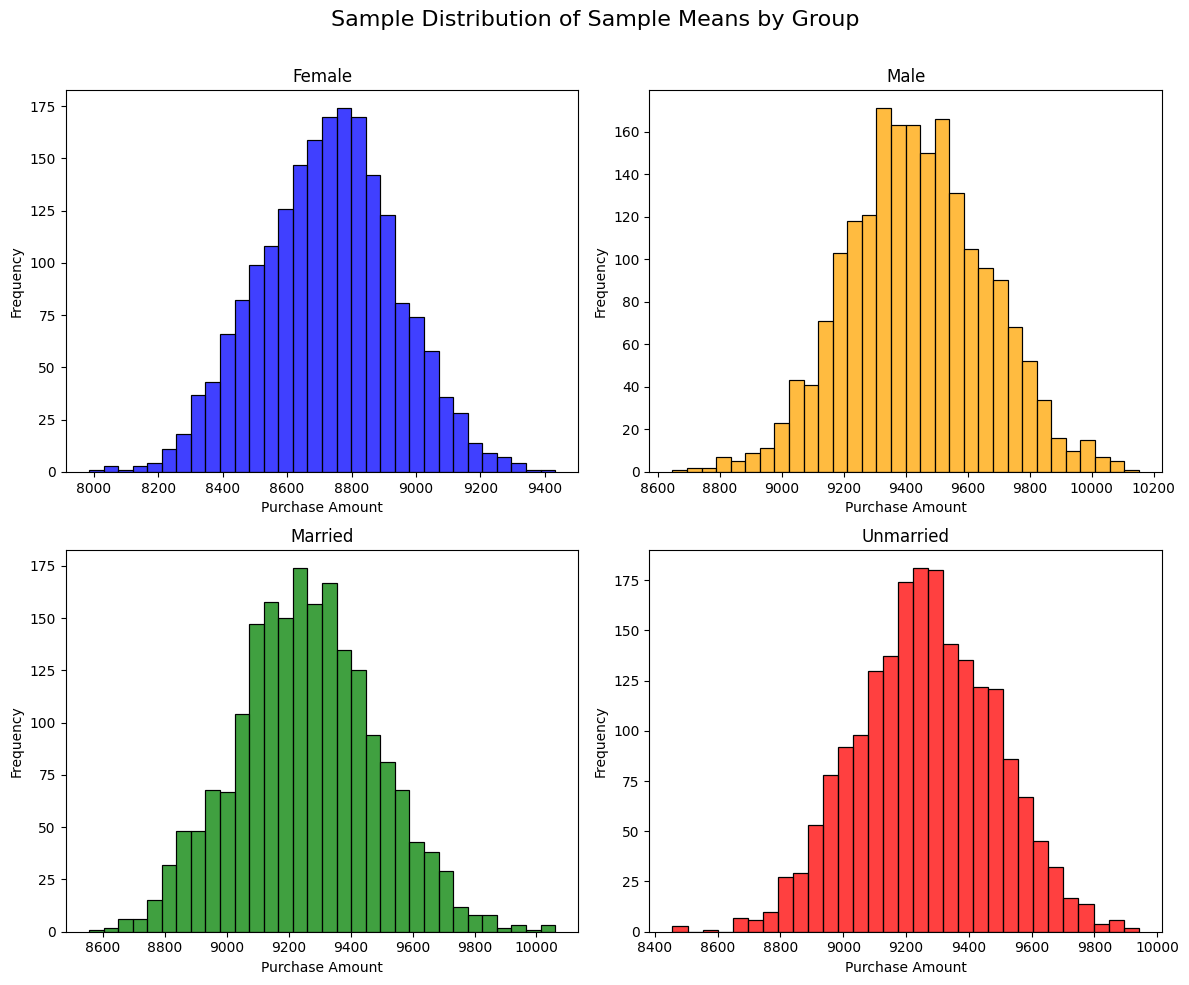

In [ ]:

# Function to calculate sample mean
def calculate_sample_mean(data, sample_size):
    sample_means = []
    num_samples = 2000  # Number of samples

    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        sample_means.append(np.mean(sample))

    return sample_means

# Sample sizes
sample_size = 500

# Separate data for different groups
female_purchase = walmart_df[walmart_df['Gender'] == 'F']['Purchase']
male_purchase = walmart_df[walmart_df['Gender'] == 'M']['Purchase']
married_purchase = walmart_df[walmart_df['Marital_Status'] == 1]['Purchase']
unmarried_purchase = walmart_df[walmart_df['Marital_Status'] == 0]['Purchase']

# Calculate sample means for each group
sample_means_female = calculate_sample_mean(female_purchase, sample_size)
sample_means_male = calculate_sample_mean(male_purchase, sample_size)
sample_means_married = calculate_sample_mean(married_purchase, sample_size)
sample_means_unmarried = calculate_sample_mean(unmarried_purchase, sample_size)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Sample Distribution of Sample Means by Group', fontsize=16)

# Female
sns.histplot(sample_means_female, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Female')
axes[0, 0].set_xlabel('Purchase Amount')
axes[0, 0].set_ylabel('Frequency')

# Male
sns.histplot(sample_means_male, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Male')
axes[0, 1].set_xlabel('Purchase Amount')
axes[0, 1].set_ylabel('Frequency')

# Married
sns.histplot(sample_means_married, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Married')
axes[1, 0].set_xlabel('Purchase Amount')
axes[1, 0].set_ylabel('Frequency')

# Unmarried
sns.histplot(sample_means_unmarried, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Unmarried')
axes[1, 1].set_xlabel('Purchase Amount')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


>>> Sample mean distribution for Gender and Marital Status looks like Normal or Gaussian Distribution

In [ ]:
walmart_df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_Group_Num
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,0.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,0.0


In [ ]:
# Function to calculate confidence interval
def calculate_ci(data, sample_size, confidence_level):
    sample_means = []
    num_samples = 1000  # Number of samples

    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        sample_means.append(np.mean(sample))

    mean_sample_means = np.mean(sample_means)
    std_sample_means = np.std(sample_means, ddof=1)
    margin_of_error = std_sample_means * (1.96 / np.sqrt(sample_size))  # Z-score for 95% confidence

    lower_bound = mean_sample_means - margin_of_error
    upper_bound = mean_sample_means + margin_of_error

    return lower_bound, upper_bound

In [ ]:


# Choose parameters
sample_size_Married = 3000

sample_size_Unmarried = 3000
confidence_level = 0.95

# Separate data for female and male customers
married_purchase = walmart_df[walmart_df['Marital_Status'] == 1]['Purchase']

unmarried_purchase = walmart_df[walmart_df['Marital_Status'] == 0]['Purchase']

# Calculate confidence interval for female customers
ci_married = calculate_ci(female_purchase, sample_size_Married, confidence_level)

# Calculate confidence interval for male customers
ci_unmarried = calculate_ci(male_purchase, sample_size_Unmarried, confidence_level)

print("Confidence Interval for Married Mean:", ci_married)
print("Confidence Interval for Unmarried Mean:", ci_unmarried)


Confidence Interval for Married Mean: (8731.084122384922, 8737.21010294841)
Confidence Interval for Unmarried Mean: (9436.820473762193, 9443.51200090447)


In [ ]:


# Choose parameters
sample_size_Female = 2000

sample_size_Male = 2000
confidence_level = 0.95

# Separate data for female and male customers
female_purchase = walmart_df[walmart_df['Gender'] == 'F']['Purchase']

male_purchase = walmart_df[walmart_df['Gender'] == 'M']['Purchase']

# Calculate confidence interval for female customers
ci_female = calculate_ci(female_purchase, sample_size_Female, confidence_level)

# Calculate confidence interval for male customers
ci_male = calculate_ci(male_purchase, sample_size_Male, confidence_level)

print("Confidence Interval for Female Mean:", ci_female)
print("Confidence Interval for Male Mean:", ci_male)


Confidence Interval for Female Mean: (8726.560509544111, 8735.853670455888)
Confidence Interval for Male Mean: (9439.528539898298, 9449.666818101707)


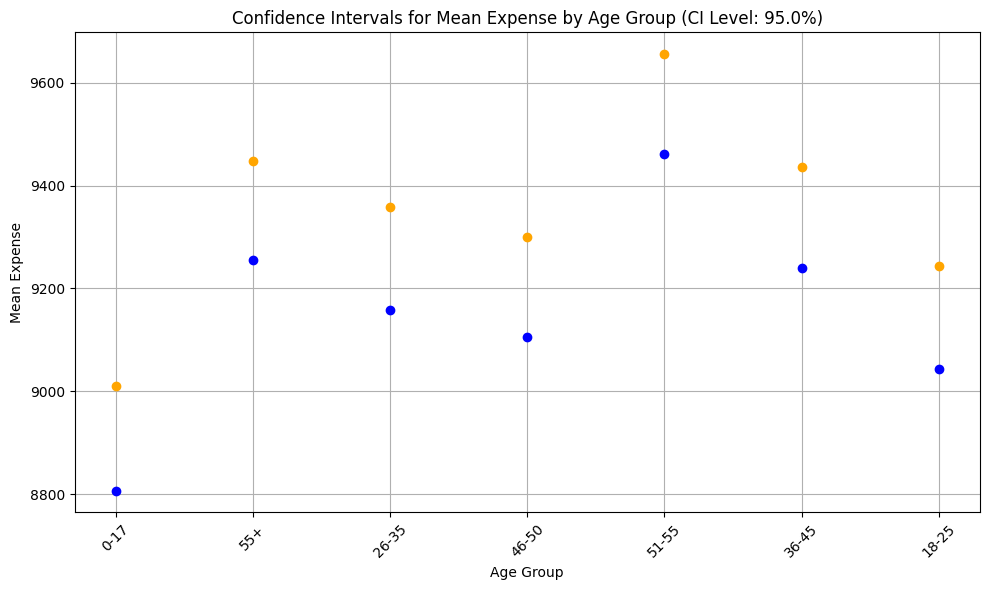

In [ ]:
# Choose parameters
sample_size = 100  # Choose the sample size
confidence_level = 0.95  # Choose the confidence level (e.g., 0.90, 0.95, 0.99)

# List of unique age groups
age_groups = walmart_df['Age'].unique()

# Initialize dictionaries to store confidence intervals for each age group
ci_by_age = {}

# Calculate confidence intervals for each age group
for age_group in age_groups:
    age_group_purchase = walmart_df[walmart_df['Age'] == age_group]['Purchase']
    ci = calculate_ci(age_group_purchase, sample_size, confidence_level)
    ci_by_age[age_group] = ci

# Plot the graph
plt.figure(figsize=(10, 6))
for age_group, ci in ci_by_age.items():
    plt.plot([age_group], ci[0], marker='o', color='blue')
    plt.plot([age_group], ci[1], marker='o', color='orange')
plt.xlabel('Age Group')
plt.ylabel('Mean Expense')
plt.title(f'Confidence Intervals for Mean Expense by Age Group (CI Level: {confidence_level * 100}%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
ci_by_age

{'0-17': (8806.603176041066, 9009.641343958938),
 '55+': (9254.694418067138, 9448.33198193286),
 '26-35': (9158.1145070161, 9358.409292983895),
 '46-50': (9104.77705778315, 9299.387062216847),
 '51-55': (9462.404156633946, 9655.980583366056),
 '36-45': (9239.435075466707, 9436.80582453329),
 '18-25': (9043.459659722894, 9242.833500277107)}

In [ ]:
# Print confidence intervals for each age group
for age_group, ci in ci_by_age.items():
    print(f"Confidence Interval for {age_group} Age Group: ({ci[0]:.2f}, {ci[1]:.2f})")


Confidence Interval for 0-17 Age Group: (8806.60, 9009.64)
Confidence Interval for 55+ Age Group: (9254.69, 9448.33)
Confidence Interval for 26-35 Age Group: (9158.11, 9358.41)
Confidence Interval for 46-50 Age Group: (9104.78, 9299.39)
Confidence Interval for 51-55 Age Group: (9462.40, 9655.98)
Confidence Interval for 36-45 Age Group: (9239.44, 9436.81)
Confidence Interval for 18-25 Age Group: (9043.46, 9242.83)


 I'll analyze the confidence intervals based on the values you provided:
Confidence Interval for 0-17 Age Group: (8806.60, 9009.64)

Confidence Interval for 55+ Age Group: (9254.69, 9448.33)

Confidence Interval for 26-35 Age Group: (9158.11, 9358.41)

Confidence Interval for 46-50 Age Group: (9104.78, 9299.39)

Confidence Interval for 51-55 Age Group: (9462.40, 9655.98)

Confidence Interval for 36-45 Age Group: (9239.44, 9436.81)

Confidence Interval for 18-25 Age Group: (9043.46, 9242.83)

From these intervals, it appears that some intervals do overlap, while others may not.

# **6. Business Insights**

Based on the analysis and visualization of the Walmart dataset, here are some insights that can be derived:

### 1. **Gender and Purchase:**
   - Female customers tend to spend slightly more on average compared to male customers.
   - There is variation in purchase amounts for both genders, with some high spenders in each category.

### 2. **Marital Status and Purchase:**
   - Marital status doesn't seem to have a significant impact on purchase amounts.
   - Both married and unmarried customers exhibit a wide range of spending behavior.
   -The number of unmarried customers exceeds that of married customers in terms of quantity

### 3. **Age and Purchase:**
   - Customers across different age groups contribute to a wide distribution of purchase amounts.
   - The 51-55 age group has a relatively high frequency of purchases.
   -The number of 26-35 age group customers exceeds in terms of quantity

### 4. **Product Categories:**
   - Product categories vary in popularity, but the most common categories are category 1 and category 5.
   - Category 5 has the highest median purchase amount, indicating higher-priced products.

### 5. **Correlations:**
   - There is a weak positive correlation between 'Occupation' and 'Purchase'.
   - 'Marital_Status' and 'Purchase' have a weak negative correlation.

### 6. **Black Friday Analysis:**
   - On Black Friday, customers tend to make higher purchases compared to other days.
   - This suggests that Black Friday is a significant shopping event for Walmart customers.

### 7. **Central Limit Theorem (CLT):**
   - The CLT demonstrates that the distribution of sample means approaches a normal distribution.
   - As the sample size increases, the sample mean becomes a more accurate estimate of the population mean.

### 8. **Confidence Intervals:**
   - Confidence intervals provide a range within which the population parameter (e.g., mean purchase) is likely to fall.
   - With a larger sample size, the confidence interval becomes narrower and more accurate.

### 9. **Product Category Analysis:**
   - Top product categories by purchase quantity are categories 1, 5, and 8.
   - Top product categories by total purchase amount are categories 5, 1, and 8.



# **7. Recommendations**
### **1. Targeted Marketing:**
Given the significant difference in spending between male and female customers, Walmart can develop targeted marketing strategies to appeal to each gender's preferences and shopping behaviors. Tailored marketing campaigns can promote products that align with the interests of male and female customers, thus optimizing sales and customer engagement.

### **2. Product Assortment and Placement:**
Walmart can optimize the product assortment and placement in stores based on the spending preferences of male and female customers. For example, they can ensure that products preferred by each gender are prominently displayed to enhance visibility and increase sales.

### **3. Pricing and Promotions:**
 Understanding the spending differences can help Walmart design pricing strategies and promotions that cater to the distinct needs and preferences of male and female customers. Customized discounts and offers can encourage both groups to make more purchases.

### **4. Personalization:**
Walmart can implement personalized marketing efforts for male and female customers, tailoring product recommendations and offers based on individual preferences and past purchase behaviors.

### **5. Customer Experience Enhancement:**
 By recognizing the different spending patterns of male and female customers, Walmart can enhance the overall customer experience for each group. This could include customizing store layouts and staff interactions to better meet the preferences and needs of male and female shoppers.

### **6. Data-Driven Decision Making:**
 The conclusion drawn from the data highlights the importance of data-driven decision-making. Walmart can continue to collect and analyze customer data to uncover further insights and trends, allowing them to make informed and strategic business decisions.

## **7. Further Research and Customer Surveys:**
Walmart can conduct additional research and customer surveys to delve deeper into the reasons behind the spending differences between male and female customers. Gathering feedback directly from customers can provide valuable insights to refine marketing strategies and improve customer satisfaction.

By leveraging the conclusion that male and female spending patterns differ significantly, Walmart can implement targeted strategies to maximize revenue, enhance customer loyalty, and deliver a more personalized shopping experience for all customers. Understanding and catering to the diverse needs of their customer base can help Walmart maintain a competitive edge in the retail market and build long-lasting customer relationships.



